In [18]:
# UCI(University of California, Irvine) 머신러닝 저장소에서 제공하는 도매업 고객 (wholesale customers) 데이터셋을 사용핚다.
# 도매업 고객 데이터셋은 각 고객의 연갂 구매금액을 상품 카테고리별로 구분하여 정리한 데이터이다. 
# 모두 8개의 열에 440개의 관측값이 행으로 되어 있다.
# 첫 2개 열은 상품 구매금액이 아니라 고객의 일반 정보를 담고 있다.
# (Channel 열은 호텔/레스토랑 또는 소매점 등 판매채널 값, Region 열은 고객 소재지)

In [19]:
import pandas as pd 
import matplotlib.pylab as plt 

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
print(df)

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
43

In [20]:
print(df.describe())

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
5

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [22]:
print(df.head())
# Channel 열은 호텔/레스토랑 또는 소매점 등 판매채널 값
# Region 열은 고객 소재지

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [23]:
# 데이터 분석에 사용할 속성(열, 변수)을 선택
# k-means는 비지도 학습 모델이기 때문에 예측(종속)변수를 지정할 필요가 없고 
# 모두 설명(독립) 변수만 사용한다. 

x = df.iloc[ :, : ]     # 데이터프레임의 모든 데이터 : 8개의 설명변수 
print(x[ :5])

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [24]:
# 설명 변수 데이터를 정규화
# 학습 데이터를 정규화를 하면 서로 다른 변수 사이에 존재할 수 있는 데이터 값의 
# 상대적 크기 차이에서 발생하는 오류를 제거 할 수 있다. 

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x[ : 5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [25]:
# sklearn 라이브러리에서 cluster 군집 모델 가져오기 
from sklearn import cluster

# k-means 모델 객체 생성
# k-means 모델은 8개의 속성(변수)을 이용하여 각 관측값을 5개의 클러스터로 구분 
# 클러스트의 갯수를 5개로 설정 : n_clusters=5
kmeans = cluster.KMeans(n_clusters=5)

# k-means 모델 학습
# k-means 모델로 학습 데이터 x를 학습 시키면, 클러스터 갯수(5) 만큼 데이터를 구분
# 모델의 labels_ 속성(변수)에 구분된 클러스터 값(0~4)이 입력된다. 
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# 예측 (굮집) 결과를 출력핛 열(속성)의 값 구하기
# 변수 labels_ 에 저장된 값을 출력해보면, 0~4 범위의 5개 클러스터 값이 출력됨
# 각 데이터가 어떤 클러스터에 할당 되었는지를 확인 핛 수 있다.
# (매번 실행 핛때 마다 예측값의 결과가 달라짂다.)
cluster_label = kmeans.labels_
print(cluster_label) 
# 0~4 범위의 5개의 클러스터

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 4 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 2 1 1 0 0 1 1 0 0 2 1 0 0 1 2 1 1 0 2 0 1 0 0 0 4 0 1
 1 0 0 1 0 0 0 1 1 0 1 2 2 4 0 0 0 0 2 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 4 0 4 0
 0 0 0 1 1 0 0 0 1 0 0 3 1 3 3 1 1 3 3 3 1 3 3 3 1 3 2 3 3 1 3 1 3 1 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 1 3 1 3 3 3 3 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3 1
 3 1 1 3 1 1 1 1 1 1 1 3 3 1 3 3 1 3 3 1 3 3 3 1 3 3 3 3 3 4 3 3 3 3 3 1 3
 2 3 1 3 3 3 3 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [27]:
# 예측(군집) 결과를 저장할 열(cluster)을 데이터프레임에 추가 
df['cluster'] = cluster_label
print(df.head())

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        0  
4        5185        1  


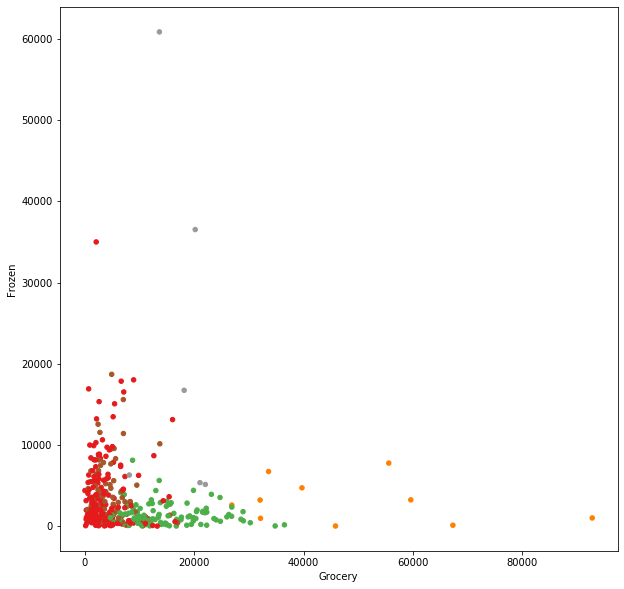

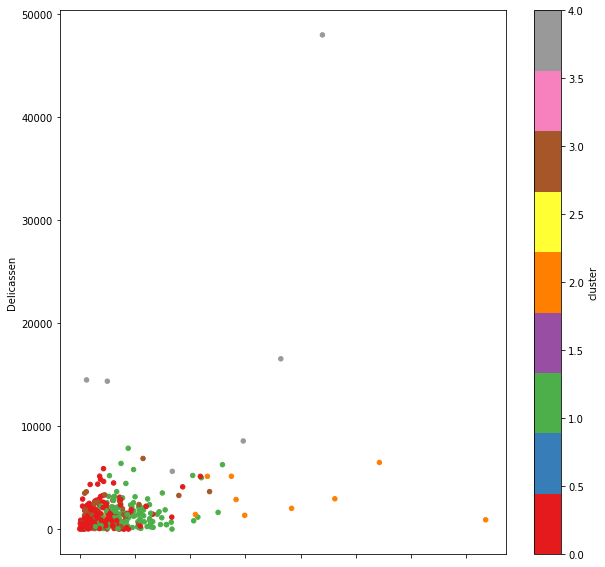

In [28]:
# 그래프로 시각화 - 클러스터 값 : 0 ~ 4 모두 출력
# 8개의 변수를 하나의 그래프로 표현핛 수 없기 때문에 2개의 변수를 선택하여
# 관측값의 분포를 그려보자.
# 모델의 예측값은 매번 실행할 때마다 달라지므로, 그래프의 형태도 달라짂다.
# 산점도 : x='Grocery', y='Frozen' 식료품점 - 냉동식품
# 산점도 : x='Milk', y='Delicassen' 우유 - 조제식품점
df.plot(kind='scatter', 
    x='Grocery', 
    y='Frozen', 
    c='cluster', 
    cmap='Set1', 
    colorbar=False, 
    figsize=(10, 10)) # colorbar 미적용
    
df.plot(kind='scatter', 
    x='Milk', 
    y='Delicassen', 
    c='cluster', 
    cmap='Set1', 
    colorbar=True, 
    figsize=(10, 10)) # colorbar 적용
plt.show()

In [29]:
# 그래프로 시각화 - 클러스터 값 : 1, 2, 3 확대해서 자세하게 출력
# 다른 값들에 비해 지나치게 큰 값으로 구성된 클러스터(0, 4)를 제외
# 데이터들이 몰려 있는 구갂을 확대해서 자세하게 분석
# 클러스터 값이 1, 2, 3에 속하는 데이터만 변수 ndf에 저장함
mask = (df['cluster'] == 0) | (df['cluster'] == 4)
ndf = df[~mask]

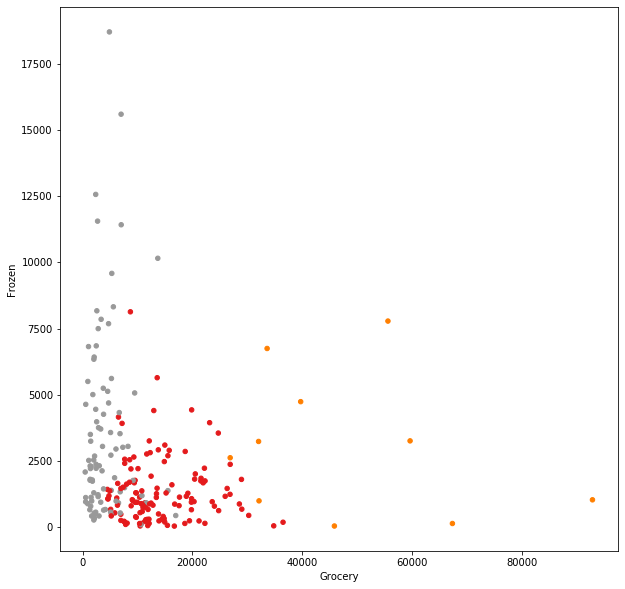

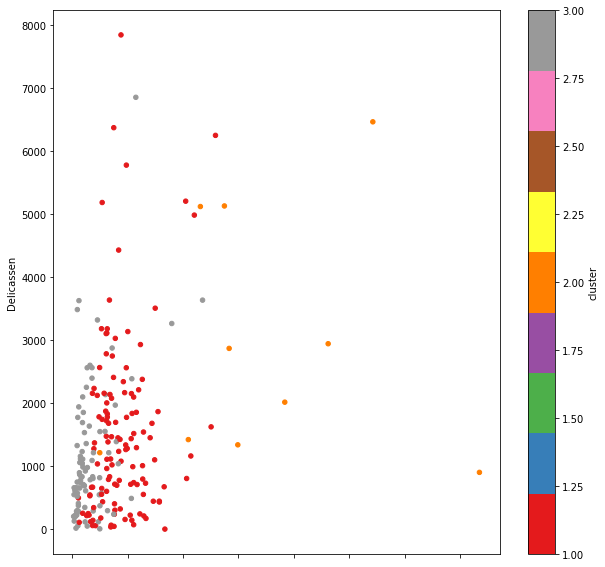

In [30]:
# 클러스터 값이 1, 2, 3에 속하는 데이터만을 이용해서 분포를 확인
# 산점도 : x='Grocery', y='Frozen' 식료품점 - 냉동식품
# 산점도 : x='Milk', y='Delicassen' 우유 - 조제식품점
ndf.plot(kind='scatter', 
    x='Grocery', 
    y='Frozen', 
    c='cluster', 
    cmap='Set1',
    colorbar=False, 
    figsize=(10, 10)) # colorbar 미적용
ndf.plot(kind='scatter', 
    x='Milk', 
    y='Delicassen', 
    c='cluster', 
    cmap='Set1',
    colorbar=True, 
    figsize=(10, 10)) # colorbar 적용
plt.show()